# [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the Cookbook.

Customarily, we import as follows:

In [1]:
import numpy as np
import pandas as pd

## Object creation
See the Data Structure Intro section.

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range("20130101", periods=6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
print(df)

                   A         B         C         D
2013-01-01  0.774242  0.175773  0.775865 -0.442643
2013-01-02 -0.738076 -0.618407 -1.735410 -1.418939
2013-01-03  1.517726 -2.481053 -1.382083  0.729300
2013-01-04 -1.740222  0.584302  0.447275  3.297872
2013-01-05  0.153120 -1.965236 -0.218770 -1.144174
2013-01-06 -0.529650 -1.560010 -0.244510  0.395261


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


The columns of the resulting DataFrame have different dtypes.

The columns of the resulting DataFrame have different dtypes.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:
![df2.<TAB>](img/df2_tab.png)

As you can see, the columns A, B, C, and D are automatically tab completed. E and F are there as well; the rest of the attributes have been truncated for brevity.

## Viewing data
See the Basics section.

Here is how to view the top and bottom rows of the frame:

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.774242,0.175773,0.775865,-0.442643
2013-01-02,-0.738076,-0.618407,-1.735410,-1.418939
2013-01-03,1.517726,-2.481053,-1.382083,0.729300
2013-01-04,-1.740222,0.584302,0.447275,3.297872
2013-01-05,0.153120,-1.965236,-0.218770,-1.144174


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.740222,0.584302,0.447275,3.297872
2013-01-05,0.153120,-1.965236,-0.218770,-1.144174
2013-01-06,-0.529650,-1.560010,-0.244510,0.395261


Display the index, columns:

Display the index, columns:

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and **NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column**. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

In [11]:
df.to_numpy()

array([[ 0.77424242,  0.17577284,  0.77586497, -0.44264322],
       [-0.7380759 , -0.61840701, -1.73540994, -1.41893902],
       [ 1.51772613, -2.4810535 , -1.38208301,  0.72930028],
       [-1.74022217,  0.58430181,  0.44727453,  3.297872  ],
       [ 0.15311987, -1.965236  , -0.21877005, -1.14417403],
       [-0.5296504 , -1.56000996, -0.24450954,  0.3952615 ]])

For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive.

In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

>**Note**
> DataFrame.to_numpy() does not include the index or column labels in the output.

describe() shows a quick statistic summary of your data:

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.093810,-0.977439,-0.392939,0.236113
std,1.159935,1.222606,0.990461,1.717442
min,-1.740222,-2.481053,-1.735410,-1.418939
25%,-0.685970,-1.863929,-1.097690,-0.968791
50%,-0.188265,-1.089208,-0.231640,-0.023691
75%,0.618962,-0.022772,0.280763,0.645791
max,1.517726,0.584302,0.775865,3.297872


Transposing your data:

In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.774242,-0.738076,1.517726,-1.740222,0.153120,-0.529650
B,0.175773,-0.618407,-2.481053,0.584302,-1.965236,-1.560010
C,0.775865,-1.735410,-1.382083,0.447275,-0.218770,-0.244510
D,-0.442643,-1.418939,0.729300,3.297872,-1.144174,0.395261


Sorting by an axis:

In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.442643,0.775865,0.175773,0.774242
2013-01-02,-1.418939,-1.735410,-0.618407,-0.738076
2013-01-03,0.729300,-1.382083,-2.481053,1.517726
2013-01-04,3.297872,0.447275,0.584302,-1.740222
2013-01-05,-1.144174,-0.218770,-1.965236,0.153120
2013-01-06,0.395261,-0.244510,-1.560010,-0.529650


Sorting by values:

In [16]:
df.sort_values(by="B")

,A,B,C,D
2013-01-03,1.517726,-2.481053,-1.382083,0.729300
2013-01-05,0.153120,-1.965236,-0.218770,-1.144174
2013-01-06,-0.529650,-1.560010,-0.244510,0.395261
2013-01-02,-0.738076,-0.618407,-1.735410,-1.418939
2013-01-01,0.774242,0.175773,0.775865,-0.442643
2013-01-04,-1.740222,0.584302,0.447275,3.297872


## Selection

>**Note**
>While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

See the indexing documentation Indexing and Selecting Data and MultiIndex / Advanced Indexing.

### Getting
Selecting a single column, which yields a Series, equivalent to df.A:

In [17]:
df["A"]

2013-01-01    0.774242
2013-01-02   -0.738076
2013-01-03    1.517726
2013-01-04   -1.740222
2013-01-05    0.153120
2013-01-06   -0.529650
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [18]:
df[0:3]

,A,B,C,D
2013-01-01,0.774242,0.175773,0.775865,-0.442643
2013-01-02,-0.738076,-0.618407,-1.735410,-1.418939
2013-01-03,1.517726,-2.481053,-1.382083,0.729300


In [19]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.738076,-0.618407,-1.735410,-1.418939
2013-01-03,1.517726,-2.481053,-1.382083,0.729300
2013-01-04,-1.740222,0.584302,0.447275,3.297872


### Selection by label
See more in Selection by Label.

For getting a cross section using a label:

In [20]:
df.loc[dates[0]]

A    0.774242
B    0.175773
C    0.775865
D   -0.442643
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [21]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,0.774242,0.175773
2013-01-02,-0.738076,-0.618407
2013-01-03,1.517726,-2.481053
2013-01-04,-1.740222,0.584302
2013-01-05,0.153120,-1.965236
2013-01-06,-0.529650,-1.560010


Showing label slicing, both endpoints are included:

In [22]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.738076,-0.618407
2013-01-03,1.517726,-2.481053
2013-01-04,-1.740222,0.584302


Reduction in the dimensions of the returned object:

In [23]:
df.loc["20130102", ["A", "B"]]

A   -0.738076
B   -0.618407
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [24]:
df.loc[dates[0], "A"]

0.7742424166499782

For getting fast access to a scalar (equivalent to the prior method):

In [25]:
df.at[dates[0], "A"]

0.7742424166499782

### Selection by position
See more in Selection by Position.

Select via the position of the passed integers:

In [26]:
df.iloc[3]

A   -1.740222
B    0.584302
C    0.447275
D    3.297872
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/Python:

In [27]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.740222,0.584302
2013-01-05,0.153120,-1.965236


By lists of integer position locations, similar to the NumPy/Python style:

In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.738076,-1.735410
2013-01-03,1.517726,-1.382083
2013-01-05,0.153120,-0.218770


For slicing rows explicitly:

In [29]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.738076,-0.618407,-1.735410,-1.418939
2013-01-03,1.517726,-2.481053,-1.382083,0.729300


For slicing columns explicitly:

In [30]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.175773,0.775865
2013-01-02,-0.618407,-1.735410
2013-01-03,-2.481053,-1.382083
2013-01-04,0.584302,0.447275
2013-01-05,-1.965236,-0.218770
2013-01-06,-1.560010,-0.244510


For getting a value explicitly:

In [31]:
df.iloc[1, 1]

-0.6184070093353697

For getting fast access to a scalar (equivalent to the prior method):

In [32]:
df.iat[1, 1]

-0.6184070093353697

### Boolean indexing
Using a single column’s values to select data.

In [33]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.774242,0.175773,0.775865,-0.442643
2013-01-03,1.517726,-2.481053,-1.382083,0.729300
2013-01-05,0.153120,-1.965236,-0.218770,-1.144174


Selecting values from a DataFrame where a boolean condition is met.

In [34]:
df[df > 0]

,A,B,C,D
2013-01-01,0.774242,0.175773,0.775865,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,1.517726,NaN,NaN,0.729300
2013-01-04,NaN,0.584302,0.447275,3.297872
2013-01-05,0.153120,NaN,NaN,NaN
2013-01-06,NaN,NaN,NaN,0.395261


Using the isin() method for filtering:

In [35]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,0.774242,0.175773,0.775865,-0.442643,one
2013-01-02,-0.738076,-0.618407,-1.735410,-1.418939,one
2013-01-03,1.517726,-2.481053,-1.382083,0.729300,two
2013-01-04,-1.740222,0.584302,0.447275,3.297872,three
2013-01-05,0.153120,-1.965236,-0.218770,-1.144174,four
2013-01-06,-0.529650,-1.560010,-0.244510,0.395261,three


In [36]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,1.517726,-2.481053,-1.382083,0.729300,two
2013-01-05,0.153120,-1.965236,-0.218770,-1.144174,four


## Setting
Setting a new column automatically aligns the data by the indexes.

In [37]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
print(s1)

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64


In [38]:
df["F"] = s1

Setting values by label:

In [39]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [40]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [41]:
df.loc[:, "D"] = np.array([5] * len(df))

The result of the prior setting operations.

In [42]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.775865,5,NaN
2013-01-02,-0.738076,-0.618407,-1.735410,5,1.0
2013-01-03,1.517726,-2.481053,-1.382083,5,2.0
2013-01-04,-1.740222,0.584302,0.447275,5,3.0
2013-01-05,0.153120,-1.965236,-0.218770,5,4.0
2013-01-06,-0.529650,-1.560010,-0.244510,5,5.0


A where operation with setting.

In [43]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.775865,-5,NaN
2013-01-02,-0.738076,-0.618407,-1.735410,-5,-1.0
2013-01-03,-1.517726,-2.481053,-1.382083,-5,-2.0
2013-01-04,-1.740222,-0.584302,-0.447275,-5,-3.0
2013-01-05,-0.153120,-1.965236,-0.218770,-5,-4.0
2013-01-06,-0.529650,-1.560010,-0.244510,-5,-5.0


## Missing data
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [44]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
print(df1)

                   A         B         C  D    F    E
2013-01-01  0.000000  0.000000  0.775865  5  NaN  1.0
2013-01-02 -0.738076 -0.618407 -1.735410  5  1.0  1.0
2013-01-03  1.517726 -2.481053 -1.382083  5  2.0  NaN
2013-01-04 -1.740222  0.584302  0.447275  5  3.0  NaN


To drop any rows that have missing data.

In [45]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.738076,-0.618407,-1.73541,5,1.0,1.0


Filling missing data.

In [46]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.775865,5,5.0,1.0
2013-01-02,-0.738076,-0.618407,-1.735410,5,1.0,1.0
2013-01-03,1.517726,-2.481053,-1.382083,5,2.0,5.0
2013-01-04,-1.740222,0.584302,0.447275,5,3.0,5.0


To get the boolean mask where values are nan.

In [47]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations
See the Basic section on Binary Ops.

### Stats
Operations in general exclude missing data.

Performing a descriptive statistic:

In [48]:
df.mean()

A   -0.222850
B   -1.006734
C   -0.392939
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [49]:
df.mean(1)

2013-01-01    1.443966
2013-01-02    0.581621
2013-01-03    0.930918
2013-01-04    1.458271
2013-01-05    1.393823
2013-01-06    1.533166
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [50]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.517726,-3.481053,-2.382083,4.0,1.0
2013-01-04,-4.740222,-2.415698,-2.552725,2.0,0.0
2013-01-05,-4.846880,-6.965236,-5.218770,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply
Applying functions to the data:

In [52]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.775865,5,NaN
2013-01-02,-0.738076,-0.618407,-0.959545,10,1.0
2013-01-03,0.779650,-3.099461,-2.341628,15,3.0
2013-01-04,-0.960572,-2.515159,-1.894353,20,6.0
2013-01-05,-0.807452,-4.480395,-2.113124,25,10.0
2013-01-06,-1.337102,-6.040405,-2.357633,30,15.0


In [53]:
df.apply(lambda x: x.max() - x.min())

A    3.257948
B    3.065355
C    2.511275
D    0.000000
F    4.000000
dtype: float64

## Histogramming
See more at Histogramming and Discretization.

In [54]:
 s = pd.Series(np.random.randint(0, 7, size=10))
print(s)

0    0
1    1
2    1
3    4
4    5
5    1
6    6
7    4
8    4
9    1
dtype: int32


In [55]:
s.value_counts()

1    4
4    3
0    1
5    1
6    1
dtype: int64

## String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.


In [56]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge
### Concat
pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the Merging section.

Concatenating pandas objects together with concat():

In [57]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.725879,0.466103,0.507157,1.388982
1,0.654433,0.873281,-0.250245,-0.744837
2,-0.512535,-0.643018,1.835996,-0.312496
3,-0.539530,0.047213,0.907305,-1.317897
4,0.766482,1.340037,-1.599961,-0.443747
5,-2.730549,-0.314216,-0.116487,-1.050062
6,-0.605516,1.281193,1.490327,-1.605711
7,-1.874065,-1.176633,-0.511704,0.546427
8,-0.180830,-1.500514,0.062681,-0.542420
9,1.959324,0.067768,-1.041447,-1.475833


In [58]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-1.725879,0.466103,0.507157,1.388982
1,0.654433,0.873281,-0.250245,-0.744837
2,-0.512535,-0.643018,1.835996,-0.312496
3,-0.539530,0.047213,0.907305,-1.317897
4,0.766482,1.340037,-1.599961,-0.443747
5,-2.730549,-0.314216,-0.116487,-1.050062
6,-0.605516,1.281193,1.490327,-1.605711
7,-1.874065,-1.176633,-0.511704,0.546427
8,-0.180830,-1.500514,0.062681,-0.542420
9,1.959324,0.067768,-1.041447,-1.475833


>**Note**
>
>Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it. See Appending to dataframe for more.

#### Join
SQL style merges. See the Database style joining section.

In [59]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [60]:
right

,key,rval
0,foo,4
1,foo,5


In [61]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [62]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [63]:
right

,key,rval
0,foo,4
1,bar,5


In [64]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping
By “group by” we are referring to a process involving one or more of the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the Grouping section.

In [65]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
print(df)

     A      B         C         D
0  foo    one -1.069097  0.629776
1  bar    one -0.206250  1.164656
2  foo    two -1.029993  2.212690
3  bar  three  0.026432 -0.058226
4  foo    two -1.119735  1.309931
5  bar    two  0.572973 -0.722519
6  foo    one -0.477135 -0.748382
7  foo  three  0.437386  1.260418


Grouping and then applying the sum() function to the resulting groups.

In [66]:
df.groupby("A").sum()

,C,D
A,,
bar,0.393155,0.383911
foo,-3.258573,4.664433


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function.

In [67]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.206250  1.164656
    three  0.026432 -0.058226
    two    0.572973 -0.722519
foo one   -1.546232 -0.118607
    three  0.437386  1.260418
    two   -2.149728  3.522621

## Reshaping
See the sections on Hierarchical Indexing and Reshaping.

### Stack

In [68]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
print(df2)

                     A         B
first second                    
bar   one    -0.209257 -0.377565
      two    -0.783867  0.093782
baz   one     0.848531  2.298968
      two     0.097486  0.827668


The stack() method “compresses” a level in the DataFrame’s columns.

In [69]:
stacked = df2.stack()
print(stacked)

first  second   
bar    one     A   -0.209257
               B   -0.377565
       two     A   -0.783867
               B    0.093782
baz    one     A    0.848531
               B    2.298968
       two     A    0.097486
               B    0.827668
dtype: float64


With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [70]:
stacked.unstack()

A         B
first second                    
bar   one    -0.209257 -0.377565
      two    -0.783867  0.093782
baz   one     0.848531  2.298968
      two     0.097486  0.827668

In [71]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.209257 -0.783867
      B -0.377565  0.093782
baz   A  0.848531  0.097486
      B  2.298968  0.827668

In [72]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.209257  0.848531
       B -0.377565  2.298968
two    A -0.783867  0.097486
       B  0.093782  0.827668

### Pivot tables
See the section on Pivot Tables.

In [73]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
print(df)

        A  B    C         D         E
0     one  A  foo -0.773175 -0.609868
1     one  B  foo  1.572804 -1.962666
2     two  C  foo -0.226036  0.245085
3   three  A  bar  0.287272  0.033572
4     one  B  bar -1.204659 -1.261038
5     one  C  bar -1.404273 -1.632052
6     two  A  foo -0.984589 -1.066207
7   three  B  foo -0.134169 -0.287992
8     one  C  foo -1.683850  0.219701
9     one  A  bar -1.296779  0.885580
10    two  B  bar  1.338216  0.700893
11  three  C  bar -0.934848  0.854338


We can produce pivot tables from this data very easily:

In [74]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -1.296779 -0.773175
      B -1.204659  1.572804
      C -1.404273 -1.683850
three A  0.287272       NaN
      B       NaN -0.134169
      C -0.934848       NaN
two   A       NaN -0.984589
      B  1.338216       NaN
      C       NaN -0.226036

## Time series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.


In [75]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    26324
Freq: 5T, dtype: int32

Time zone representation:

In [76]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts)

2012-03-06   -0.263107
2012-03-07   -1.941422
2012-03-08   -1.084442
2012-03-09   -0.646366
2012-03-10    0.764633
Freq: D, dtype: float64


In [77]:
ts_utc = ts.tz_localize("UTC")
print(ts_utc)

2012-03-06 00:00:00+00:00   -0.263107
2012-03-07 00:00:00+00:00   -1.941422
2012-03-08 00:00:00+00:00   -1.084442
2012-03-09 00:00:00+00:00   -0.646366
2012-03-10 00:00:00+00:00    0.764633
Freq: D, dtype: float64


Converting to another time zone:

In [78]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.263107
2012-03-06 19:00:00-05:00   -1.941422
2012-03-07 19:00:00-05:00   -1.084442
2012-03-08 19:00:00-05:00   -0.646366
2012-03-09 19:00:00-05:00    0.764633
Freq: D, dtype: float64

Converting between time span representations:

In [79]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)

2012-01-31    0.919771
2012-02-29   -2.543893
2012-03-31    1.265970
2012-04-30   -0.224992
2012-05-31   -0.107531
Freq: M, dtype: float64


In [80]:
ps = ts.to_period()
print(ps)

2012-01    0.919771
2012-02   -2.543893
2012-03    1.265970
2012-04   -0.224992
2012-05   -0.107531
Freq: M, dtype: float64


In [81]:
ps.to_timestamp()

2012-01-01    0.919771
2012-02-01   -2.543893
2012-03-01    1.265970
2012-04-01   -0.224992
2012-05-01   -0.107531
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [82]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
print(ts.head())

1990-03-01 09:00   -1.993324
1990-06-01 09:00    0.603438
1990-09-01 09:00    0.376974
1990-12-01 09:00    1.572360
1991-03-01 09:00    0.514288
Freq: H, dtype: float64


## Categoricals
pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [83]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

Convert the raw grades to a categorical data type.

In [84]:
df["grade"] = df["raw_grade"].astype("category")
print(df["grade"])

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']


Rename the categories to more meaningful names (assigning to Series.cat.categories() is in place!).

In [85]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default).

In [86]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order.

In [87]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories.

In [88]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
See the Plotting docs.

We use the standard convention for referencing the matplotlib API:


In [89]:
import matplotlib.pyplot as plt
plt.close("all")

<AxesSubplot:>

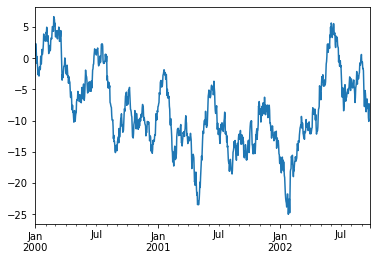

In [90]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

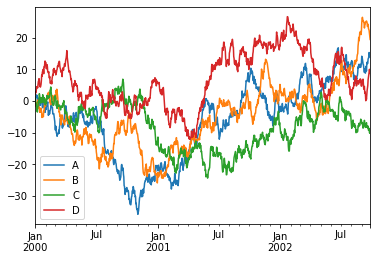

In [91]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

## Getting data in/out
### CSV
Writing to a csv file.

In [92]:
df.to_csv("foo.csv")

Reading from a csv file.

In [93]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.010441,-0.310682,0.798618,2.092954
1,2000-01-02,0.337391,-1.207776,-0.268078,2.793370
2,2000-01-03,1.607227,-1.680567,-0.701156,2.723583
3,2000-01-04,1.351309,-1.535867,-0.954598,3.422524
4,2000-01-05,1.940145,-1.430211,-2.118201,4.545534
...,...,...,...,...,...
995,2002-09-22,13.977808,22.572522,-9.218849,8.412659
996,2002-09-23,15.310291,22.290371,-8.631663,9.078767
997,2002-09-24,14.204198,21.391095,-9.959479,10.006726
998,2002-09-25,13.917912,20.779019,-10.189085,9.115698


### HDF5
Reading and writing to [HDFStores](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-hdf5).

> Note: You'll need to install `hdf5` and `pytables` before running the following code.
```shell
(eda_dev39) $ conda install hdf5
(eda_dev39) $ conda install pytables
```

Writing to a HDF5 Store.

In [94]:
df.to_hdf("foo.h5", "df")

Reading from a HDF5 Store.

In [95]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,-0.010441,-0.310682,0.798618,2.092954
2000-01-02,0.337391,-1.207776,-0.268078,2.793370
2000-01-03,1.607227,-1.680567,-0.701156,2.723583
2000-01-04,1.351309,-1.535867,-0.954598,3.422524
2000-01-05,1.940145,-1.430211,-2.118201,4.545534
...,...,...,...,...
2002-09-22,13.977808,22.572522,-9.218849,8.412659
2002-09-23,15.310291,22.290371,-8.631663,9.078767
2002-09-24,14.204198,21.391095,-9.959479,10.006726
2002-09-25,13.917912,20.779019,-10.189085,9.115698


### Excel Reading and writing to MS Excel.

> Note: You'll need to install `openpyxl`, `xlrd` and `pyxlsb` before running the following code.
```shell
(eda_dev39) $ conda install -c anaconda openpyxl
(eda_dev39) $ conda install -c anaconda xlrd
(eda_dev39) $ conda install -c conda-forge pyxlsb
```

Writing to an excel file.

In [96]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file.

In [97]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.010441,-0.310682,0.798618,2.092954
1,2000-01-02,0.337391,-1.207776,-0.268078,2.793370
2,2000-01-03,1.607227,-1.680567,-0.701156,2.723583
3,2000-01-04,1.351309,-1.535867,-0.954598,3.422524
4,2000-01-05,1.940145,-1.430211,-2.118201,4.545534
...,...,...,...,...,...
995,2002-09-22,13.977808,22.572522,-9.218849,8.412659
996,2002-09-23,15.310291,22.290371,-8.631663,9.078767
997,2002-09-24,14.204198,21.391095,-9.959479,10.006726
998,2002-09-25,13.917912,20.779019,-10.189085,9.115698


### Gotchas
If you are attempting to perform an operation you might see an exception like:

In [98]:
import sys
try:
    if pd.Series([False, True, False]):
        print("I was true")
except:
        print("Unexpected error:", sys.exc_info()[0])

Unexpected error: <class 'ValueError'>


See Comparisons for an explanation and what to do.

See Gotchas as well.